Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Read Data

In [2]:
file = pd.ExcelFile("../../../../data/final/Handball_09.03.2023_fertig.xlsx")

file.sheet_names

df = file.parse('3. League')

# drop last col comments & favorite corner & empy rows at end
df = df.iloc[:, :-2]
df.columns


Index(['Home team', 'Guest team', 'Matchday', 'Player 3rd league',
       'Shooter team', 'club region', 'Game Minute',
       'Difference between\nfinal whistle and kickoff \n(in seconds)',
       'Home Goal', 'Guest Goal',
       'Goalkeeper position\n(0 = on the line;\n 1 = in front of the line)',
       'Toss successful?\n(0 = no; 1 = yes;\n 2 = yes, afterthrow',
       'Left/right \nhanded?\n(1 = right; 2 = left)', 'Throw direction',
       'Pressure situation?\n(0 = no; \n1= Goalkeeper change;\n2 = last 7 meter held; 3 = goal difference < 4 + from 50. minute; 4 = 1+2; 5 = 1+3; 6 = 2+3; 7 = 1+2+3; 8 = last 7 meter successful in follow-up throw\n',
       'Number of seven meters\n(of the player)',
       'Throw quadrant last 7 meter',
       'last 7 meter successful?\n(0 = no; 1 = yes; \n2 = yes, in the afterthrow'],
      dtype='object')

Cleanup & Renaming

In [3]:
df.replace('unklar', np.nan,inplace=True)
df.replace('unklar ', np.nan,inplace=True)
df.replace('fehlend', np.nan,inplace=True)
df.replace('-', np.nan,inplace=True)
df.replace(-99, np.nan,inplace=True)
df.replace('-99', np.nan,inplace=True)
df.replace('?', np.nan,inplace=True)
df.replace('?!', np.nan,inplace=True)
#df.dropna(inplace=True)
df.columns = [ 'homeTeam','opponentTeam','day','name','team','region','playTime',
              'whistleThrowTime','homeGoals','opponentGoals',
              'goalKeeperPosition',
              'throwSuccess','LRHandy','throwDirection',
              'pressureSituation','noOfThrowsFromPlayer',
              'throwQuadrantLastThrow','lastThrowSuccess']
df = df.astype({'homeTeam':'string', 'opponentTeam':'string','day':'float16','name':'string','team':'string','region':'string','playTime':'float16',
              'whistleThrowTime':'float16','homeGoals':'float16','opponentGoals':'float16','goalKeeperPosition':'float16',
              'throwSuccess':'float16','LRHandy':'float16','throwDirection':'float16','pressureSituation':'float16','noOfThrowsFromPlayer':'float16',
              'throwQuadrantLastThrow':'float16','lastThrowSuccess':'float16', })
df

,homeTeam,opponentTeam,day,name,team,region,playTime,whistleThrowTime,homeGoals,opponentGoals,goalKeeperPosition,throwSuccess,LRHandy,throwDirection,pressureSituation,noOfThrowsFromPlayer,throwQuadrantLastThrow,lastThrowSuccess
0,TV Emsdetten,ASV Hamm-Westfalen II,1.0,<NA>,<NA>,west,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,HLZ Ahlener SG,TV Emsdetten,2.0,<NA>,<NA>,west,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TV Emsdetten,VfL Gladbeck,3.0,Holzner,TV Emsdetten,west,2.0,23.0,0.0,0.0,1.0,1.0,1.0,8.0,0.0,1.0,NaN,1.0
3,TV Emsdetten,VfL Gladbeck,3.0,Holzner,TV Emsdetten,west,7.0,16.0,5.0,1.0,1.0,1.0,1.0,3.0,0.0,2.0,8.0,1.0
4,TV Emsdetten,VfL Gladbeck,3.0,Holzner,TV Emsdetten,west,31.0,28.0,19.0,9.0,1.0,1.0,1.0,7.0,0.0,3.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1014,Stralsunder HV,DHK Flensborg,19.0,Skroblien,Stralsunder HV,north,6.0,23.0,3.0,2.0,1.0,1.0,1.0,4.0,0.0,1.0,NaN,NaN
1015,Stralsunder HV,DHK Flensborg,19.0,Skroblien,Stralsunder HV,north,29.0,20.0,20.0,14.0,1.0,1.0,1.0,3.0,0.0,2.0,4.0,1.0
1016,Stralsunder HV,DHK Flensborg,19.0,Skroblien,Stralsunder HV,north,49.0,36.0,28.0,22.0,1.0,0.0,1.0,3.0,0.0,3.0,3.0,1.0
1017,Stralsunder HV,DHK Flensborg,19.0,Skroblien,Stralsunder HV,north,29.0,20.0,20.0,14.0,1.0,1.0,1.0,3.0,0.0,2.0,4.0,1.0


Cleaning

In [4]:
df = df.loc[:,('homeTeam','opponentTeam','throwDirection','throwSuccess','name')].copy()
# Naming correction
df['homeTeam'].replace('SV Salamander Kornwestheim.....', 'SV Salamander Kornwestheim 1894',inplace=True,regex=True)
df['opponentTeam'].replace('SV Salamander Kornwestheim.....', 'SV Salamander Kornwestheim 1894',inplace=True,regex=True)
df['throwSuccess'].replace(2.0, 1.0,inplace=True)
df.loc[0, 'penaltyNo'] = 1
for i in range(1, len(df)):
    df.loc[i, 'penaltyNo'] = df.loc[i-1, 'penaltyNo']+1 if df.loc[i-1, 'homeTeam'] == df.loc[i, 'homeTeam'] and df.loc[i-1, 'opponentTeam'] == df.loc[i, 'opponentTeam'] else 1
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
pd.set_option("display.max_rows", None, "display.max_columns", None)
#df.sort_index(ascending=True)

In [5]:
df1 =pd.crosstab(df['penaltyNo'], df['throwDirection'], margins=True, margins_name="Total") 
df1

throwDirection,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,Total
penaltyNo,,,,,,,,,,
1.0,21,6,29,4,1,13,49,25,47,195
2.0,19,6,30,5,2,12,31,19,59,183
3.0,14,6,27,6,0,7,26,23,44,153
4.0,19,2,13,6,1,6,43,12,30,132
5.0,6,4,17,1,2,6,26,9,32,103
6.0,3,2,11,2,1,2,15,5,25,66
7.0,4,3,8,2,0,2,9,3,8,39
8.0,2,3,5,3,0,1,7,0,6,27
9.0,5,0,2,1,0,1,8,3,4,24


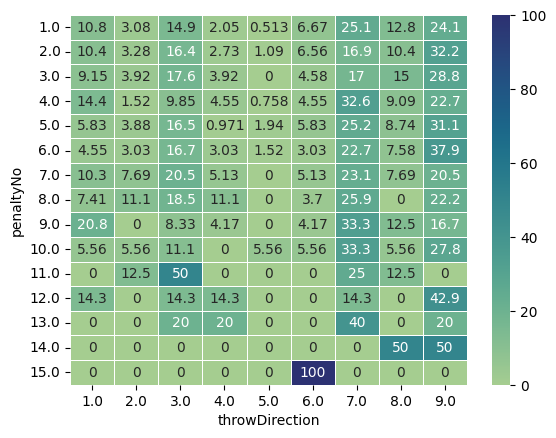

In [6]:
ax = sns.heatmap(pd.crosstab(df['penaltyNo'], df['throwDirection'], normalize='index')*100, linewidth=0.5, annot=True, cmap="crest",vmin=0,vmax=100,fmt='.3g')
#ax.xaxis.tick_top()
plt.show()

Success

In [7]:
dfs = df.loc[df['throwSuccess'] == 1]
df2 =pd.crosstab(dfs['penaltyNo'], dfs['throwDirection'], margins=True, margins_name="Total") 
df2

throwDirection,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,Total
penaltyNo,,,,,,,,,,
1.0,15,3,20,2,0,9,42,18,42,151
2.0,13,2,25,4,0,8,23,11,51,137
3.0,11,4,21,4,0,5,24,17,41,127
4.0,18,2,11,6,1,5,33,10,26,112
5.0,3,3,13,1,2,6,23,7,25,83
6.0,1,2,9,1,1,2,12,4,19,51
7.0,3,3,8,1,0,1,6,3,8,33
8.0,1,1,2,2,0,0,6,0,5,17
9.0,3,0,1,0,0,1,6,2,4,17


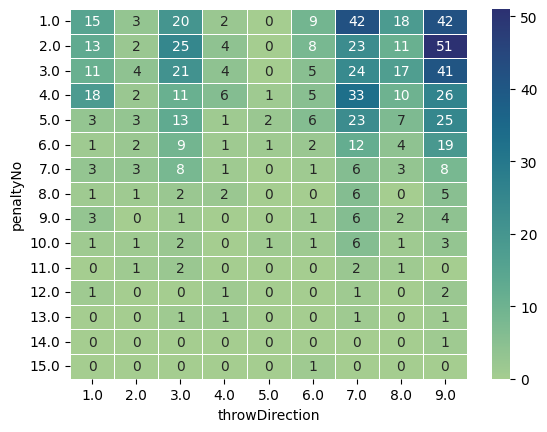

In [8]:
axs = sns.heatmap(pd.crosstab(dfs['penaltyNo'], dfs['throwDirection']), linewidth=0.5, annot=True, cmap="crest")
#ax.xaxis.tick_top()
plt.show()

Failed

In [9]:
dff = df.loc[df['throwSuccess'] == 0]
df3 =pd.crosstab(dff['penaltyNo'], dff['throwDirection'], margins=True, margins_name="Total") 
df3

throwDirection,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,Total
penaltyNo,,,,,,,,,,
1.0,6,3,9,2,1,4,7,7,5,44
2.0,6,4,5,1,2,4,8,8,8,46
3.0,3,2,6,2,0,2,2,6,3,26
4.0,1,0,2,0,0,1,10,2,4,20
5.0,3,1,4,0,0,0,3,2,7,20
6.0,2,0,2,1,0,0,3,1,6,15
7.0,1,0,0,1,0,1,3,0,0,6
8.0,1,2,3,1,0,1,1,0,1,10
9.0,2,0,1,1,0,0,2,1,0,7


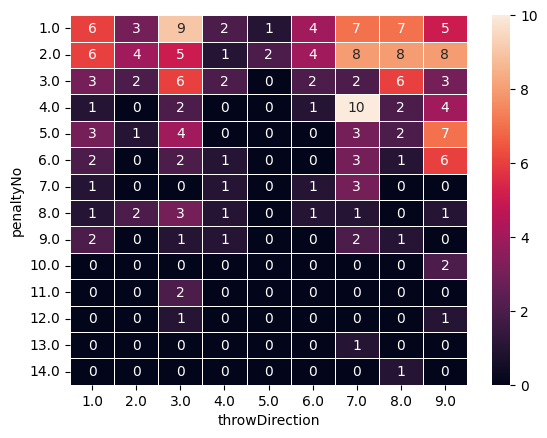

In [10]:
axf = sns.heatmap(pd.crosstab(dff['penaltyNo'], dff['throwDirection']), linewidth=0.5, annot=True)
#ax.xaxis.tick_top()
plt.show()

Percentage Success

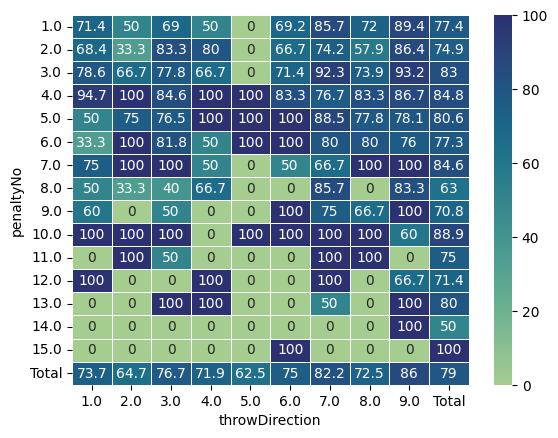

throwDirection,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,Total
penaltyNo,,,,,,,,,,
1.0,71.428571,50.000000,68.965517,50.000000,0.0,69.230769,85.714286,72.000000,89.361702,77.435897
2.0,68.421053,33.333333,83.333333,80.000000,0.0,66.666667,74.193548,57.894737,86.440678,74.863388
3.0,78.571429,66.666667,77.777778,66.666667,0.0,71.428571,92.307692,73.913043,93.181818,83.006536
4.0,94.736842,100.000000,84.615385,100.000000,100.0,83.333333,76.744186,83.333333,86.666667,84.848485
5.0,50.000000,75.000000,76.470588,100.000000,100.0,100.000000,88.461538,77.777778,78.125000,80.582524
6.0,33.333333,100.000000,81.818182,50.000000,100.0,100.000000,80.000000,80.000000,76.000000,77.272727
7.0,75.000000,100.000000,100.000000,50.000000,0.0,50.000000,66.666667,100.000000,100.000000,84.615385
8.0,50.000000,33.333333,40.000000,66.666667,0.0,0.000000,85.714286,0.000000,83.333333,62.962963
9.0,60.000000,0.000000,50.000000,0.000000,0.0,100.000000,75.000000,66.666667,100.000000,70.833333


In [11]:
relSuccess = df2/df1*100
relSuccess.replace(np.nan,0,inplace=True)
axrs = sns.heatmap(relSuccess, linewidth=0.5, annot=True, cmap="crest",fmt='.3g')
#ax.xaxis.tick_top()
plt.show()
relSuccess

Pattern